In [2]:
# Import all required modules
import pandas as pd
import numpy as np

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [3]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [6]:
df = pd.read_csv('C:/Users/Denis/Desktop/ML jup/hm2 demo/mlbootcamp5_train.csv', sep=';')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (62404, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1,20228,1,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,2,18857,1,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,3,17623,2,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,4,17474,1,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0


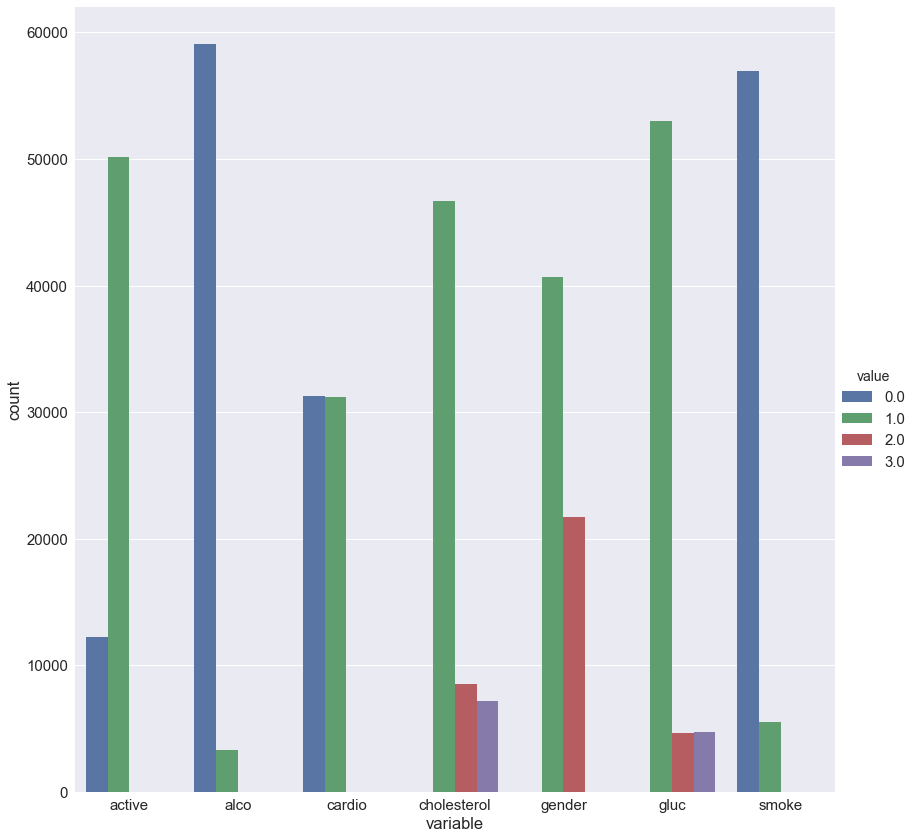

In [7]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

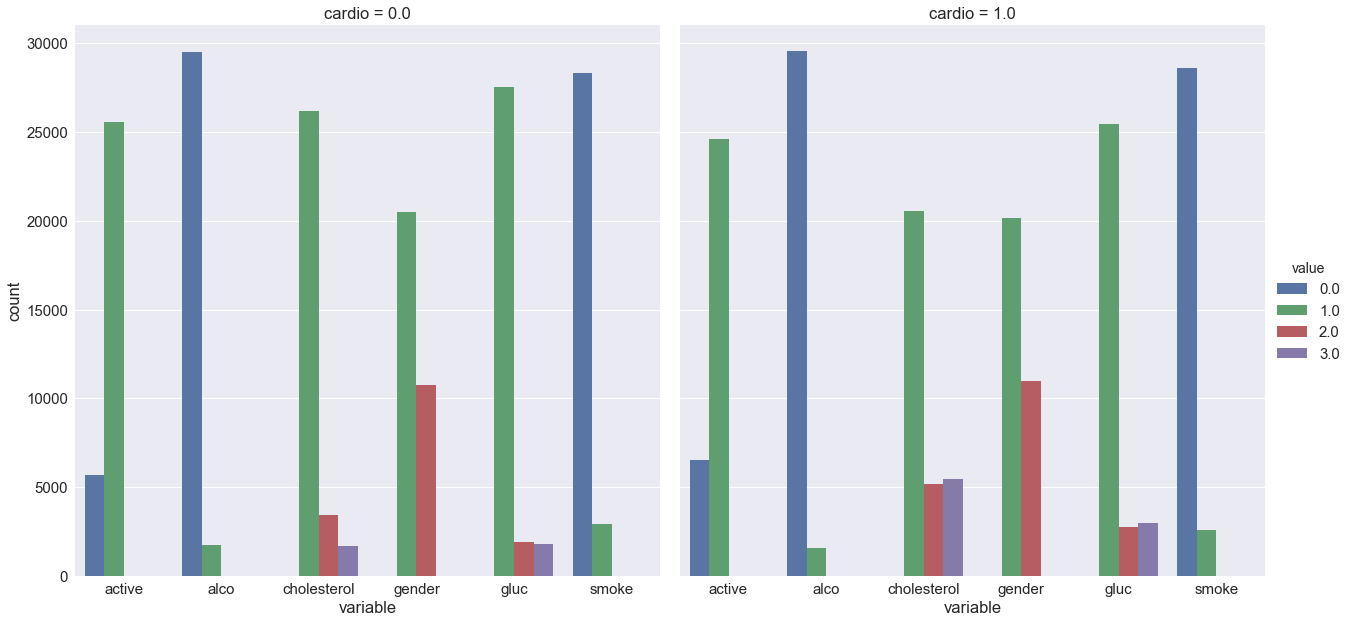

In [19]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);

In [20]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
62404
----------
age
8001
----------
gender
2 [(1, 40659), (2, 21745)]
----------
height
105
----------
weight
276
----------
ap_hi
150
----------
ap_lo
149
----------
cholesterol
3 [(1.0, 46704), (2.0, 8547), (3.0, 7152)]
----------
gluc
3 [(1.0, 53010), (2.0, 4629), (3.0, 4764)]
----------
smoke
2 [(0.0, 56921), (1.0, 5482)]
----------
alco
2 [(0.0, 59077), (1.0, 3326)]
----------
active
2 [(0.0, 12234), (1.0, 50169)]
----------
cardio
2 [(0.0, 31250), (1.0, 31153)]
----------
age_years
28
----------


#### Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

In [7]:
df['gender'].value_counts()

1    40659
2    21745
Name: gender, dtype: int64

In [8]:
df[df['gender'] == 1]['height'].mean()

161.36681587879383

In [9]:
df[df['gender'] == 2]['height'].mean()

169.92881122097035

###### 2-мужчины, 1-женщины

#### Задание 1.2

In [10]:
df[df['gender'] == 1]['alco'].mean()

0.02565300801810222

In [11]:
df[df['gender'] == 2]['alco'].mean()

0.10498965279374568

#### Мужчины пьют больше

#### Задание 1.3

In [12]:
pd.crosstab(df['gender'], df['smoke'])

smoke,0.0,1.0
gender,,
1,39933,725
2,16988,4757


In [13]:
smoke_women = 725*100/40659
smoke_women

1.7831230477876976

In [14]:
smoke_men = 4757*100/21745
smoke_men


21.87629340078179

In [15]:
round(abs(smoke_men-smoke_women),0)

20.0

#### Ответ: 20

#### Задание 1.4

In [16]:
smoke_people = (df[df['smoke'] == 1]['age'].median())
print(smoke_people)

19126.0


In [17]:
not_smoke_people = (df[df['smoke'] == 0]['age'].median())
print(not_smoke_people)

19724.0


In [18]:
round(abs(not_smoke_people - smoke_people)/365*12,0)

20.0

#### Ответ:20

#### Question 1.5. (2 points). Calculate the fraction of the people with CVD for the two segments described above. What is the ratio of these two fractions?

In [12]:
df['age_years'] = round(df['age']/365,0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,50.0
1,1,20228,1,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,55.0
2,2,18857,1,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,52.0
3,3,17623,2,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,48.0
4,4,17474,1,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,48.0


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62404 entries, 0 to 62403
Data columns (total 14 columns):
id             62404 non-null int64
age            62404 non-null int64
gender         62404 non-null int64
height         62403 non-null float64
weight         62403 non-null float64
ap_hi          62403 non-null float64
ap_lo          62403 non-null float64
cholesterol    62403 non-null float64
gluc           62403 non-null float64
smoke          62403 non-null float64
alco           62403 non-null float64
active         62403 non-null float64
cardio         62403 non-null float64
age_years      62404 non-null float64
dtypes: float64(11), int64(3)
memory usage: 6.7 MB
None


In [21]:
first_group = df[(df['smoke'] == 1) & (df['gender'] == 2) & (df['age_years'] >= 60) & (df['age_years'] <= 64) & (df['ap_hi'] < 120)
& (df['cholesterol'] == 1)]
first_group.shape


(71, 14)

In [22]:
second_group = df[(df['smoke'] == 1) & (df['gender'] == 2) & (df['age_years'] >= 60) & (df['age_years'] <= 64) & (df['ap_hi'] < 180) & (df['ap_hi'] >= 160) & (df['cholesterol'] == 3)]
second_group.shape

(22, 14)

In [23]:
round(71/22,1)

3.2

##### ответ: 3.2

#### Question 1.6. (2 points). Choose the correct statements:

##### 1. Median BMI in the sample is within the range of normal BMI values.   нет
##### 2. The BMI for women is on average higher than for men.   да
##### 3. Healthy people have, on average, a higher BMI than the people with CVD.нет
##### 4. For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women. да

######  Normal BMI values are said to be from 18.5 to 25.

In [26]:
df['BMI'] = df['weight']/pow((df['height'])/100,2)

In [27]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,50,21.967120
1,1,20228,1,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,55,34.927679
2,2,18857,1,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,52,23.507805
3,3,17623,2,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,48,28.710479
4,4,17474,1,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,48,23.011177


In [28]:
df['BMI'].agg([np.mean, np.std, np.min, np.max, np.median])

mean       27.563524
std         6.102033
amin        3.471784
amax      298.666667
median     26.397977
Name: BMI, dtype: float64

In [29]:
BMI_women = df[df['gender'] == 1]['BMI'].mean()
BMI_men = df[df['gender'] == 2]['BMI'].mean()
print(BMI_women,BMI_men)

27.997419519745083 26.752243032951366


In [30]:
healph_people = df[df['cardio'] == 0]['BMI'].mean()
not_healph_people = df[df['cardio'] == 1]['BMI'].mean()
print(healph_people,not_healph_people)

26.569355760921315 28.560788368905968


In [31]:
men = df[(df['cardio'] == 0) & (df['alco'] == 0 ) & (df['gender'] == 2)]['BMI'].mean()
women = df[(df['cardio'] == 0) & (df['alco'] == 0 ) & (df['gender'] == 1)]['BMI'].mean()
print(men, women)

25.885853285633004 26.867139966622158


#### Ответ: 2, 4

#### 1.4. Cleaning data 
 ###### Мы видим, что данные не идеальны. Он содержит «грязь» и неточности. Мы увидим это лучше, когда мы визуализируем данные.

##### Отфильтруйте следующие сегменты пациента (мы считаем их ошибочными)

###### диастолическое давление выше, чем систолическое
###### высота строго меньше 2,5 процентиля (используйте pd.Series.quantileдля вычисления этого значения. Если вы не знакомы с этой функцией, прочитайте документы).
###### высота строго превышает 97,5 процентиля
###### вес строго меньше 2,5 процентиля
###### вес строго превышает 97,5 процентиля
###### Это не все, что мы можем сделать для очистки этих данных, но этого достаточно.

In [34]:
percentile_H025 = pd.Series(df['height']).quantile(.025)
print(percentile_H025)

150.0


In [35]:
percentile_H975 = pd.Series(df['height']).quantile(.975)
print(percentile_H975)

180.0


In [36]:
percentile_L025 = pd.Series(df['weight']).quantile(.025)
print(percentile_L025)

52.0


In [37]:
percentile_L975 = pd.Series(df['weight']).quantile(.975)
print(percentile_L975)

108.0


In [38]:
data_clean = df.drop(df[(df['height'] < percentile_H025) | (df['height'] > percentile_H975)
| (df['weight'] < percentile_L025) | (df['weight'] > percentile_L975) 
| (df["ap_lo"] > df["ap_hi"])].index)

In [39]:
data_clean.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,50,21.967120
1,1,20228,1,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0,55,34.927679
2,2,18857,1,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0,52,23.507805
3,3,17623,2,169.0,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0,48,28.710479
4,4,17474,1,156.0,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,48,23.011177


#### Question 1.7. (2 points). What percent of the original data (rounded) did we throw away?

In [40]:
round((df.shape[0] - data_clean.shape[0]) / df.shape[0] , 1)

0.1

##### ответ: 10%

#### Question 2.1. (1 point). Which pair of features has the strongest Pearson's correlation with the gender feature?

In [37]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
id,1.000000,0.004592,-0.000136,-0.006098,-0.000484,0.006173,-0.004634,0.006145,0.004735,-0.006566,-0.002709,0.005760,0.003224,0.004362,0.000951
age,0.004592,1.000000,-0.021681,-0.082047,0.052669,0.020097,0.017677,0.153103,0.097588,-0.047752,-0.029137,-0.008324,0.238283,0.999090,0.084367
gender,-0.000136,-0.021681,1.000000,0.498257,0.152856,0.005914,0.014761,-0.033705,-0.018446,0.338216,0.168289,0.004580,0.009175,-0.021879,-0.097232
height,-0.006098,-0.082047,0.498257,1.000000,0.288712,0.005198,0.007220,-0.048769,-0.018211,0.189196,0.093688,-0.008464,-0.009982,-0.082053,-0.289411
weight,-0.000484,0.052669,0.152856,0.288712,1.000000,0.029222,0.043909,0.141557,0.107037,0.065635,0.066914,-0.018413,0.179995,0.052652,0.764177
ap_hi,0.006173,0.020097,0.005914,0.005198,0.029222,1.000000,0.015202,0.022549,0.011529,-0.001638,0.000871,0.000011,0.052275,0.020125,0.023825
ap_lo,-0.004634,0.017677,0.014761,0.007220,0.043909,0.015202,1.000000,0.023008,0.012118,0.004374,0.010415,0.004368,0.065852,0.017949,0.035063
cholesterol,0.006145,0.153103,-0.033705,-0.048769,0.141557,0.022549,0.023008,1.000000,0.451989,0.011550,0.034564,0.009622,0.220850,0.153173,0.145554
gluc,0.004735,0.097588,-0.018446,-0.018211,0.107037,0.011529,0.012118,0.451989,1.000000,-0.002735,0.011515,-0.006733,0.088044,0.097595,0.101436
smoke,-0.006566,-0.047752,0.338216,0.189196,0.065635,-0.001638,0.004374,0.011550,-0.002735,1.000000,0.337908,0.024774,-0.018765,-0.047950,-0.028783


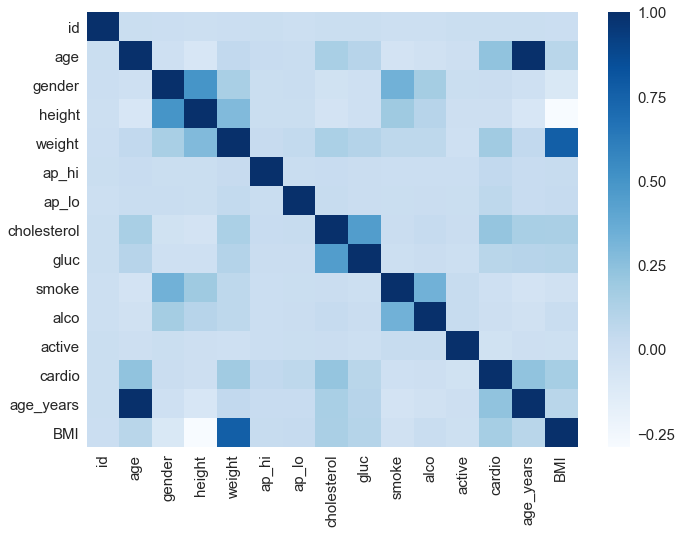

In [38]:
sns.heatmap(df.corr(method='pearson'), cmap="Blues")

#### Ответ: "height" and "smoke"

#### Question 2.2. (1 point). Which pair of features has the strongest Spearman correlation?

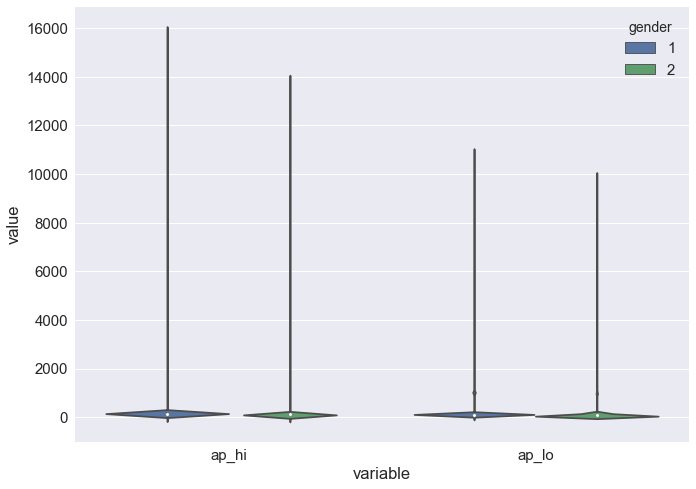

In [49]:
data = pd.melt(df, value_vars=['ap_hi', 'ap_lo'], id_vars='gender')
sns.violinplot(x='variable', y='value', hue='gender', data= data)
plt.show()

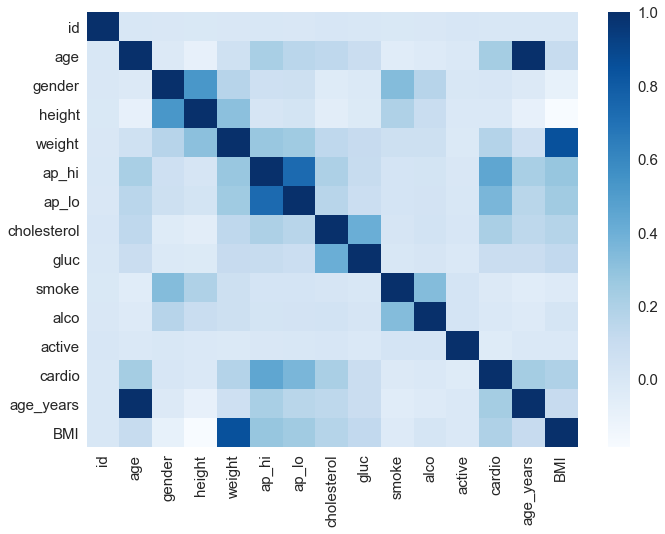

In [42]:
sns.heatmap(df.corr(method='spearman'), cmap='Blues')

### Ответ: "ap_hi" and "ap_lo"

#### Question 2.3. (1 point). Why do these features have strong rank correlation?

### ответ: пересечение этих двух признаков имеет самы темный цвет на графике относительно других признаков

#### Question 2.4. (1 point). What is the smallest age at which the number of people with CVD outnumber the number of people without CVD?

In [14]:
df['age_years'] = df['age_years'].astype('int64')


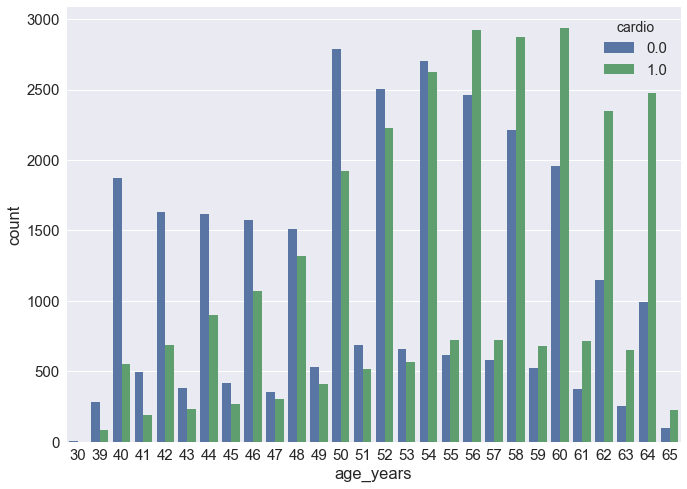

In [15]:
sns.countplot(x='age_years', hue='cardio', data=df);


### 55 лет